In [1]:
from ALMApy import run_alma, change_param, read_output
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Serif"
})

Here we asses how the $k_2$ love number changes with differing sizes of the atmosphere. We use a solid (rocky) homogeneous core with an atmosphere of varying size. The fiducial parameters are:
- The core radius is equal to the radius of Neptune, $R_\mathrm{Nep}=24\times 10^6\textrm{ m}$.
- The core density is equal to the density of Neptune, $\rho_\mathrm{Nep}=1642\textrm{ kg m}^{-3}$.
- The core rigidity is taken from ALMA3's `simple-Earth` model, which is $10^11$
- The core viscosity is taken from ALMA3's `simple-Earth` model, which is $10^21$
- The atmosphere starts at the outer radius of the core, and extends to varying radii, up to the radius of Jupiter $R_\mathrm{Jup}=69.6\times 10^6\textrm{ m}$
- The atmosphere has a density equal to the density of the atmosphere at the surface of the earth, $\rho_\mathrm{air}=1.293\textrm{kg m}^{-3}$
- The atmosphere's viscosity is equal to the viscosity of air, $\nu=5\times 10^{-5}$
- The atmosphere's rigiditiy is negligible

In [2]:
# Dimensions
R_jupiter = 69.9e6
m_neptune = 1.024e26
R_neptune = 24.6e6
rho_neptune = m_neptune/(4*np.pi/3*R_neptune**3)
print(rho_neptune)
# Material properties
rho_air = 1.293
rigidity_air = 1e-7
viscosity_air = 3e-5
rigidity_earth = 1e11
viscosity_earth = 1e21

1642.124293334446


In [3]:
change_param("time_points_minus_one", 2)
N_steps = 100
atmosphere_radii = np.linspace(R_neptune, R_jupiter, N_steps)

def get_k2_vs_radius(core_radius, atmosphere_radii, densities, rigidities, viscosities):
    data = []
    for i,atm_radius in enumerate(atmosphere_radii):
        t,k = run_alma(radii = [atm_radius, core_radius],
                    densities = densities,
                    rigidities = rigidities,
                    viscosities = viscosities,
                    model_types = ["newton", "maxwell"],
                    show_start_stop = False)
        
        data.append({"radius": atm_radius,
                    "t": t,
                    "k2": k[0]})
        #print(f"{i/N_steps*100:.0f}% done")

    return data


### Varying core radii

In [38]:
core_radii = np.linspace(0.5, 2.5, 5)*R_neptune
data = []
N_steps = 50
log_min = -2
log_max = 1
for i,core_radius in enumerate(core_radii):
    atmosphere_radii = (np.logspace(-2,1,N_steps)-10**log_min)*R_jupiter+core_radius
    data.append(get_k2_vs_radius(core_radius, atmosphere_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth]))
    print(f"{(i+1)/len(core_radii)*100:.0f}% done")

20% done
40% done
60% done
80% done
100% done


In [23]:
log_min = -2
log_max = 2
N_steps2 = 100
large_R_atm_range = (np.logspace(log_min, log_max, N_steps2)-10**log_min)*R_jupiter+2*R_neptune
large_range_data = get_k2_vs_radius(2*R_neptune, large_R_atm_range, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth])

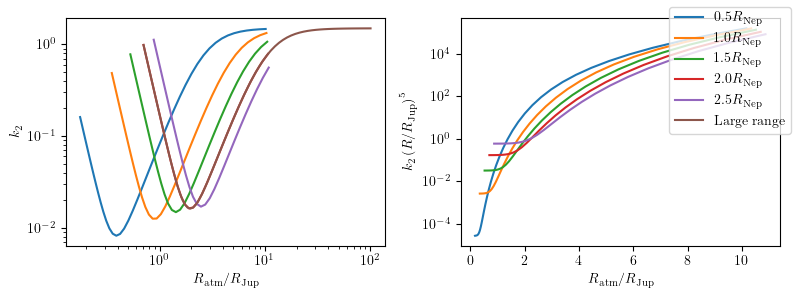

In [99]:
min_R = np.zeros(len(core_radii))
min_k2 = np.zeros(len(core_radii))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,core_radius in enumerate(core_radii):
    atmosphere_radii = np.array([d["radius"] for d in data[i]])
    k2 = np.array([d["k2"] for d in data[i]])
    min_idx = np.argmin(k2)
    min_R[i] = atmosphere_radii[min_idx]
    min_k2[i] = k2[min_idx]
    ax1.plot(atmosphere_radii/R_jupiter, k2, label=f"{core_radius/R_neptune:.1f}"+r"$R_\mathrm{Nep}$")
    ax2.plot(atmosphere_radii/R_jupiter, k2*(atmosphere_radii/R_jupiter)**5)
radii = np.array([large_range_data[i]["radius"] for i in range(len(large_range_data))])
k2 = np.array([large_range_data[i]["k2"] for i in range(len(large_range_data))])
ax1.plot(radii/R_jupiter, k2, label="Large range")

#ax1.plot(large_R_atm_range/R_jupiter, large_range_data[0]["k2"]*(large_R_atm_range/R_jupiter)**5, label="Large range")
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_ylabel(r"$k_2 \left(R/R_\mathrm{Jup}\right)^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xscale("log")
fig.legend()
fig.tight_layout()
plt.show()


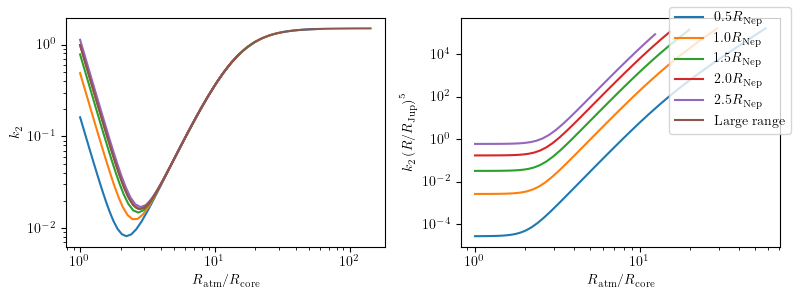

In [102]:
min_R = np.zeros(len(core_radii))
min_k2 = np.zeros(len(core_radii))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,core_radius in enumerate(core_radii):
    atmosphere_radii = np.array([d["radius"] for d in data[i]])
    k2 = np.array([d["k2"] for d in data[i]])
    min_idx = np.argmin(k2)
    min_R[i] = atmosphere_radii[min_idx]
    min_k2[i] = k2[min_idx]
    ax1.plot(atmosphere_radii/core_radius, k2, label=f"{core_radius/R_neptune:.1f}"+r"$R_\mathrm{Nep}$")
    ax2.plot(atmosphere_radii/core_radius, k2*(atmosphere_radii/R_jupiter)**5)
radii = np.array([large_range_data[i]["radius"] for i in range(len(large_range_data))])
k2 = np.array([large_range_data[i]["k2"] for i in range(len(large_range_data))])
ax1.plot(radii/(2*R_neptune), k2, label="Large range")

#ax1.plot(large_R_atm_range/R_jupiter, large_range_data[0]["k2"]*(large_R_atm_range/R_jupiter)**5, label="Large range")
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{core}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{core}$")
ax2.set_ylabel(r"$k_2 \left(R/R_\mathrm{Jup}\right)^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
fig.legend()
fig.tight_layout()
plt.show()


$$
x\equiv \log_{10}\left[R/R_\mathrm{core}\right]
$$
$$
y\equiv \log_{10}\left[k_2\left(\frac{R}{R_\mathrm{Jup}}\right)^5\right]
$$

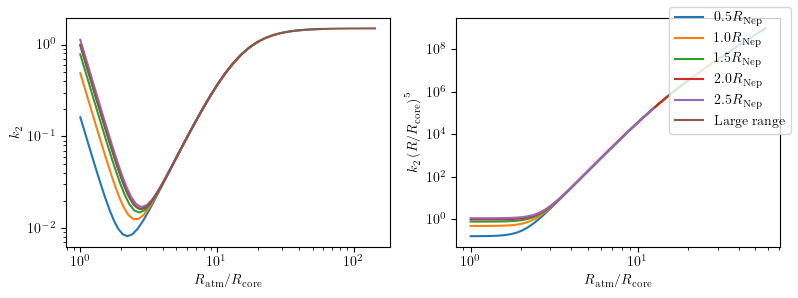

In [104]:
min_R = np.zeros(len(core_radii))
min_k2 = np.zeros(len(core_radii))

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,core_radius in enumerate(core_radii):
    atmosphere_radii = np.array([d["radius"] for d in data[i]])
    k2 = np.array([d["k2"] for d in data[i]])
    min_idx = np.argmin(k2)
    min_R[i] = atmosphere_radii[min_idx]
    min_k2[i] = k2[min_idx]
    ax1.plot(atmosphere_radii/core_radius, k2, label=f"{core_radius/R_neptune:.1f}"+r"$R_\mathrm{Nep}$")
    ax2.plot(atmosphere_radii/core_radius, k2*(atmosphere_radii/core_radius)**5)
radii = np.array([large_range_data[i]["radius"] for i in range(len(large_range_data))])
k2 = np.array([large_range_data[i]["k2"] for i in range(len(large_range_data))])
ax1.plot(radii/(2*R_neptune), k2, label="Large range")

#ax1.plot(large_R_atm_range/R_jupiter, large_range_data[0]["k2"]*(large_R_atm_range/R_jupiter)**5, label="Large range")
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{core}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{core}$")
ax2.set_ylabel(r"$k_2 \left(R/R_\mathrm{core}\right)^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
ax1.set_xscale("log")
ax2.set_xscale("log")
fig.legend()
fig.tight_layout()
plt.show()


[1 2 2 3]
[ 7.15480468  0.3419297  -2.57341464  0.02258379]


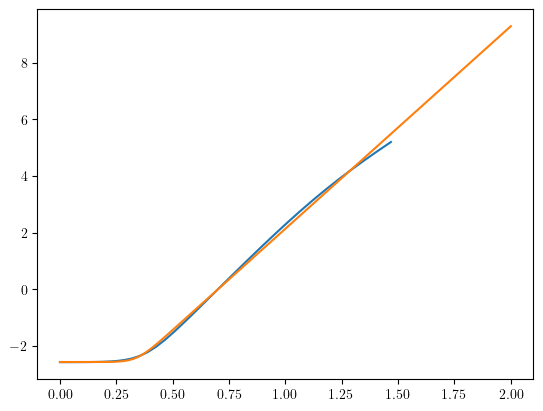

In [ ]:
from scipy.optimize import curve_fit

def f(x,a,x0,y0,h):
    #return y0 + np.exp(a*np.log(x/x0))/(1-np.exp(-np.log(x/x0)/h))
    return y0 + a*(x-x0)/(1-np.exp(-(x-x0)/h))

def global_fit()
x = np.linspace(0,2,100)
fig, ax = plt.subplots()
R_atm = np.array([d["radius"] for d in data[1]])
k2 = np.array([d["k2"] for d in data[1]])

popt, pcov = curve_fit(f, np.log10(R_atm/core_radii[1]), np.log10(k2*(R_atm/R_jupiter)**5), p0=[7, 0.4, -2.5, 0.02])
print(popt)
ax.plot(np.log10(R_atm/core_radii[1]),np.log10(k2*(R_atm/R_jupiter)**5))
ax.plot(x, f(x, *popt), label="fit")
#ax.set_xscale("log")
#ax.set_yscale("log")

Text(0, 0.5, 'minimum $k_2$')

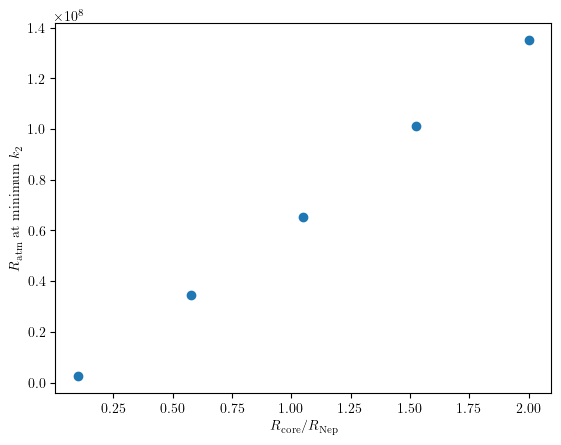

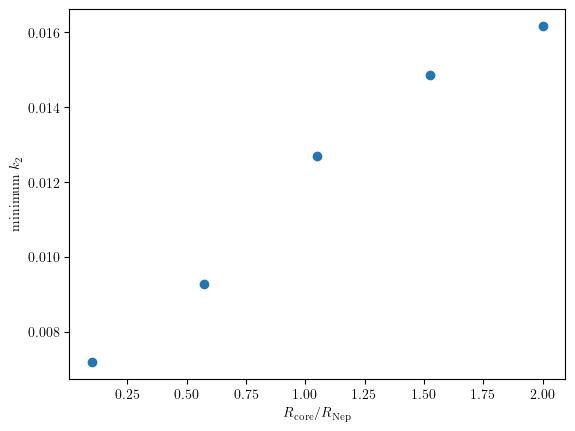

In [32]:
for i,core_radius in enumerate(core_radii):
    atmosphere_radii = np.array([d["radius"] for d in data[i]])
    k2 = np.array([d["k2"] for d in data[i]])
    min_idx = np.argmin(k2)
    min_R[i] = atmosphere_radii[min_idx]
    min_k2[i] = k2[min_idx]

fig, ax = plt.subplots()
ax.scatter(core_radii/R_neptune, min_R)
ax.set_xlabel("$R_\\mathrm{core}/R_\\mathrm{Nep}$")
ax.set_ylabel("$R_\\mathrm{atm}$ at minimum $k_2$")

fig, ax = plt.subplots()
ax.scatter(core_radii/R_neptune, min_k2)
ax.set_xlabel("$R_\\mathrm{core}/R_\\mathrm{Nep}$")
ax.set_ylabel("minimum $k_2$")
#ax.set_xscale("log")
#ax.set_yscale("log")

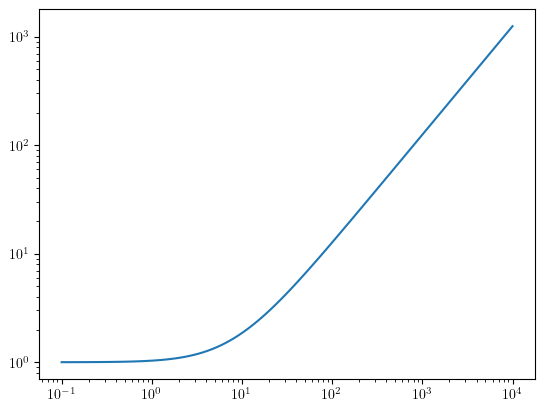

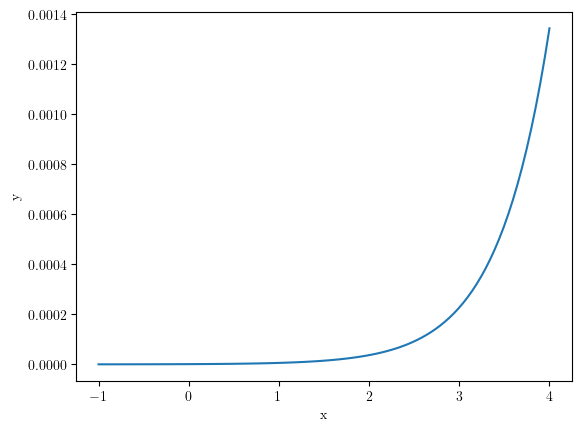

In [62]:
a = 1
x0 = 8
h = 0.5




x = np.logspace(-1,4,100)
y = np.exp((a*(np.log(x)-np.log(x0)))/(1-np.exp(-(np.log(x)-np.log(x0))/h)))
fig, ax = plt.subplots()
ax.plot(x,y)
ax.set_xscale("log")
ax.set_yscale("log")

log_x = np.log10(x)
log_y = a*(log_x-x0)/(1-np.exp(-(log_x-x0)/h))

fig, ax = plt.subplots()
ax.plot(log_x, log_y)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

/tmp/ipykernel_3433/1378368033.py:8: RuntimeWarning: invalid value encountered in divide
  log_y = a*(log_x-log_x0)/(1-np.exp(-(log_x-log_x0)/h))#+log_y0
/tmp/ipykernel_3433/1378368033.py:11: RuntimeWarning: invalid value encountered in divide
  y = y0*10**(a*np.log10(x/x0)/(1-np.exp(-(np.log10(x/x0))/h)))


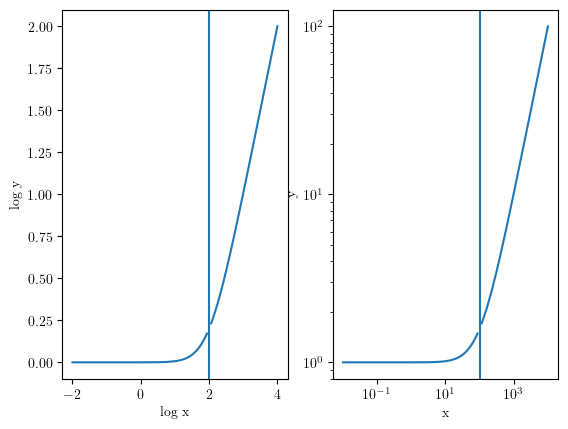

In [73]:
x0 = 100
y0 = 1
log_x0 = np.log10(x0)
log_y0 = np.log10(y0)
h = 0.2

log_x = np.linspace(-2,4,100)
log_y = a*(log_x-log_x0)/(1-np.exp(-(log_x-log_x0)/h))#+log_y0

x = np.logspace(-2,4,100)
y = y0*10**(a*np.log10(x/x0)/(1-np.exp(-(np.log10(x/x0))/h)))

fig, ax = plt.subplots(ncols=2)
ax[0].plot(log_x, log_y)
ax[0].set_xlabel("log x")
ax[0].set_ylabel("log y")
ax[0].axvline(log_x0)

ax[1].plot(x, y)
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
ax[1].axvline(x0)


### Varying core densities

In [6]:
core_densities = np.linspace(0.1, 2, 5)*rho_neptune
core_densities_data = []

for i,core_density in enumerate(core_densities):
    core_densities_data.append(get_k2_vs_radius(R_neptune, atmosphere_radii, [rho_air, core_density], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth]))
    print(f"{(i+1)/len(core_radii)*100:.0f}% done")

20% done


KeyboardInterrupt: 

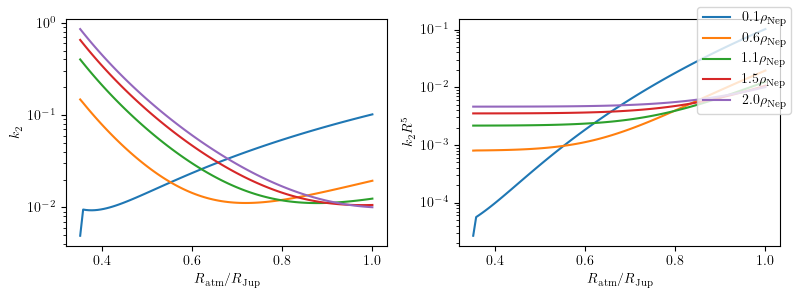

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,core_density in enumerate(core_densities):
    atmosphere_radii = np.array([d["radius"] for d in core_densities_data[i]])
    k2 = np.array([d["k2"] for d in core_densities_data[i]])
    ax1.plot(atmosphere_radii/R_jupiter, k2, label=f"{core_density/rho_neptune:.1f}"+r"$\rho_\mathrm{Nep}$")
    ax2.plot(atmosphere_radii/R_jupiter, k2*(atmosphere_radii/R_jupiter)**5)
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_ylabel(r"$k_2 R^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
fig.legend()
fig.tight_layout()
plt.show()


### Varying atmosphere density

In [ ]:
atm_densities = np.linspace(0.1, 2, 5)*rho_air
atm_densities_data = []

for i,atm_density in enumerate(atm_densities):
    atm_densities_data.append(get_k2_vs_radius(R_neptune, atmosphere_radii, [atm_density, rho_neptune], [rigidity_air, rigidity_earth], [viscosity_air, viscosity_earth]))
    print(f"{(i+1)/len(core_radii)*100:.0f}% done")

20% done
40% done
60% done
80% done
100% done


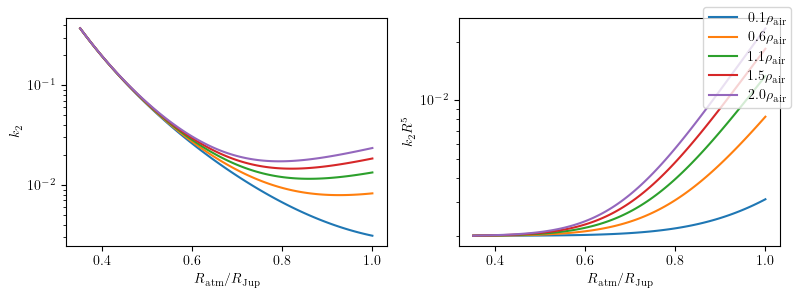

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,atm_density in enumerate(atm_densities):
    atmosphere_radii = np.array([d["radius"] for d in atm_densities_data[i]])
    k2 = np.array([d["k2"] for d in atm_densities_data[i]])
    ax1.plot(atmosphere_radii/R_jupiter, k2, label=f"{atm_density/rho_air:.1f}"+r"$\rho_\mathrm{air}$")
    ax2.plot(atmosphere_radii/R_jupiter, k2*(atmosphere_radii/R_jupiter)**5)
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_ylabel(r"$k_2 R^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
fig.legend()
fig.tight_layout()
plt.show()

### Varying atmosphere viscosity

In [ ]:
atm_viscosities = np.array([1e-3,1,1e3])*viscosity_air#np.linspace(1e-3, 10000, 3)*viscosity_air
atm_viscosity_data = []

for i,atm_visc in enumerate(atm_viscosities):
    atm_viscosity_data.append(get_k2_vs_radius(R_neptune, atmosphere_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [atm_visc, viscosity_earth]))
    print(f"{(i+1)/len(core_radii)*100:.0f}% done")

20% done
40% done
60% done


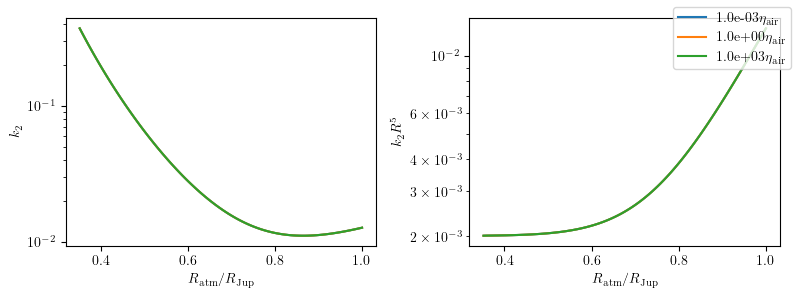

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
for i,atm_visc in enumerate(atm_viscosities):
    atmosphere_radii = np.array([d["radius"] for d in atm_viscosity_data[i]])
    k2 = np.array([d["k2"] for d in atm_viscosity_data[i]])
    ax1.plot(atmosphere_radii/R_jupiter, k2, label=f"{atm_visc/viscosity_air:.1e}"+r"$\eta_\mathrm{air}$")
    ax2.plot(atmosphere_radii/R_jupiter, k2*(atmosphere_radii/R_jupiter)**5)
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_ylabel(r"$k_2 R^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
fig.legend()
fig.tight_layout()
plt.show()

In [ ]:
#print(atm_viscosity_data[0]["k2"][-1]/atm_viscosity_data[-1]["k2"][-1])
print(atm_densities_data[0][-1]['k2'])#/atm_densities_data[-1][-1]['k2'])
print(atm_viscosity_data[0][-1]['k2']/atm_viscosity_data[2][-1]['k2'])

0.0030984085
1.0


### Atmosphere with $\eta\approx 0$

In [ ]:
no_visc = get_k2_vs_radius(R_neptune, atmosphere_radii, [rho_air, rho_neptune], [rigidity_air, rigidity_earth], [1e-20, viscosity_earth])

[{'radius': np.float64(24600000.0), 't': [0.001, 1.0, 1000.0], 'k2': 0.48765921}, {'radius': np.float64(25057575.757575758), 't': [0.001, 1.0, 1000.0], 'k2': 0.44497769}, {'radius': np.float64(25515151.515151516), 't': [0.001, 1.0, 1000.0], 'k2': 0.40662019}, {'radius': np.float64(25972727.272727273), 't': [0.001, 1.0, 1000.0], 'k2': 0.37210385}, {'radius': np.float64(26430303.03030303), 't': [0.001, 1.0, 1000.0], 'k2': 0.34112138}, {'radius': np.float64(26887878.78787879), 't': [0.001, 1.0, 1000.0], 'k2': 0.31313824}, {'radius': np.float64(27345454.545454547), 't': [0.001, 1.0, 1000.0], 'k2': 0.28793032}, {'radius': np.float64(27803030.303030305), 't': [0.001, 1.0, 1000.0], 'k2': 0.26508424}, {'radius': np.float64(28260606.060606062), 't': [0.001, 1.0, 1000.0], 'k2': 0.24439243}, {'radius': np.float64(28718181.81818182), 't': [0.001, 1.0, 1000.0], 'k2': 0.22566119}, {'radius': np.float64(29175757.575757578), 't': [0.001, 1.0, 1000.0], 'k2': 0.20860444}, {'radius': np.float64(29633333.

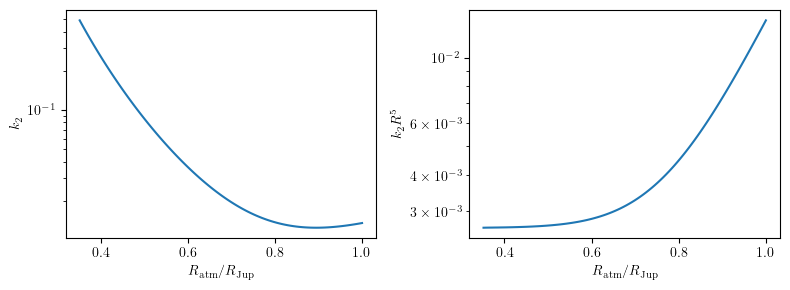

In [ ]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(8,3))
k2 = np.array([d["k2"] for d in no_visc])
atmosphere_radii = np.array([d["radius"] for d in no_visc])
ax1.plot(atmosphere_radii/R_jupiter, k2, label="No viscosity")
ax2.plot(atmosphere_radii/R_jupiter, k2*(atmosphere_radii/R_jupiter)**5)
ax1.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_xlabel(r"$R_\mathrm{atm}/R_\mathrm{Jup}$")
ax2.set_ylabel(r"$k_2 R^5$")
ax1.set_ylabel("$k_2$")
ax1.set_yscale("log")
ax2.set_yscale("log")
fig.tight_layout()
plt.show()
